# Disparities in Suicide

This notebook seeks to cover suicide, a serious and distressing public health issue that has ripple effects that impacts, families, friends, and communities across the world. While suicide is experienced by a spectrum of people, certain groups are more disproportionately impacted by suicide.  

One hypothesis I want to investigate is whether middle-aged individuals have the highest number of suicides because many people in this period of transition in life may potentially experience midlife crises which are serious life challenges such as struggles with identity, self-confidence, unemployment, substance abuse, and relationships. This notebook aims to explore the following hypothesis and questions about suicide:

**Hypothesis**

1. Middle-aged people (35-54 years) have the highest number of suicides. 

**Questions**

2. Are there gender differences in suicides?
3. Which country has the highest average rate of suicide?
4. Is there any relationship between Gross Domestic Product (GDP) and suicide rate?
5. Has the suicide rate changed over the years?

Content: __[Suicide Rates Data from 1985 to 2016 which compares socio-economic information with suicide rates by year and country](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016?datasetId=85351)__


## Sourcing and Loading 

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the notebook for matplotlib and other libraries- show plots inline
%matplotlib inline

# suppress future warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
# Load Data
suicide_df = pd.read_csv('suicide_rates_1985-2016.csv')

In [5]:
# Explore data
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
suicide_df.shape

(27820, 12)

In [10]:
# check for missing values
suicide_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [17]:
# Percentage of Missing Data in 'HDI for year' column
suicide_df['HDI for year'].isnull().sum() / suicide_df['HDI for year'].shape[0] * 100

69.93529834651329

In [20]:
# Missing Data may be partly attributed to HDI being first measured starting in 1990. 
# Drop 'HDI for year' column since too large a portion of values are missing
df = suicide_df.drop(columns=['HDI for year'])

In [22]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [23]:
# Confirm no more missing values
df.isnull().sum().sum()

0

In [25]:
# Check for duplicated rows
df[df.duplicated()]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation


In [28]:
df.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,"2,156,624,900",796,Generation X


In [30]:
# Different types of countries in dataset
countries = df['country'].unique()
print(countries)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In [31]:
# Different types of age groups
age_groups = df['age'].unique()
print(age_groups)

['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


In [32]:
# Different types of Generations
generations = df['generation'].unique()
print(generations)

['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


In [33]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


## Data Visualization

In [53]:
# number of suicides by age group
df.groupby('age')['suicides_no'] .sum().sort_values(ascending=False)

age
35-54 years    2452141
55-74 years    1658443
25-34 years    1123912
15-24 years     808542
75+ years       653118
5-14 years       52264
Name: suicides_no, dtype: int64

In [64]:
# number of suicides by age group
suicide_age = df.groupby('age')['suicides_no'] .sum().reindex(index=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

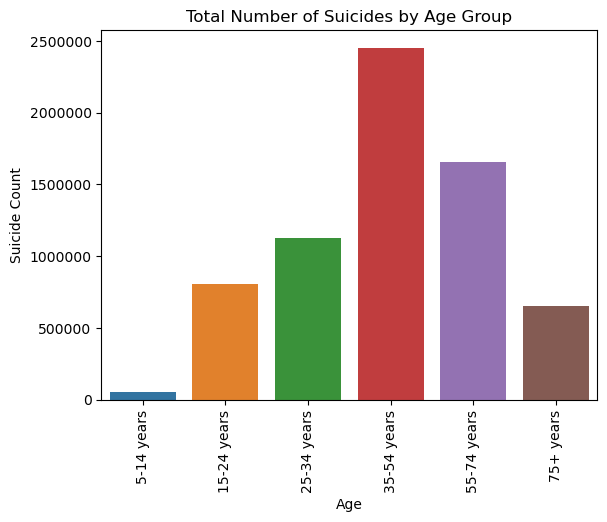

In [109]:
_ = sns.barplot(x=suicide_age.index, y= suicide_age)

_ = plt.title('Total Number of Suicides by Age Group')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Age')
_ = plt.ylabel('Suicide Count')
_ = plt.ticklabel_format(style='plain', axis='y')

The age group with the highest number of suicides are the ages of "35-54 years" with 2,452,141 and then "55-74 years" with 1,618,443.
The age group with the lowest number of suicides are the ages of "5-14 years" with 52,264 and "75+ years" with 653,118. 

In [69]:
# group by gender
suicide_gender = df.groupby('sex')['suicides_no'].sum()
print(suicide_gender)

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64


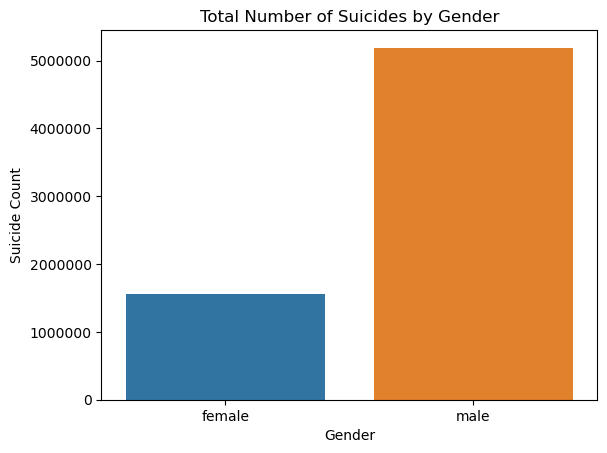

In [107]:
sns.barplot(x=suicide_gender.index, y=suicide_gender)
_ = plt.title("Total Number of Suicides by Gender")
_ = plt.xlabel('Gender')
_ = plt.ylabel('Suicide Count')
_ = plt.ticklabel_format(style='plain', axis='y')

When grouping suicides by gender, males (5,188,910) have significantly more suicides than females (1,559,510). 

In [77]:
# Group by country
country_rate = df.groupby('country')['suicides/100k pop'].mean()
print(country_rate)

country
Albania                  3.502879
Antigua and Barbuda      0.552901
Argentina               10.469328
Armenia                  3.275872
Aruba                    9.503095
                          ...    
United Arab Emirates     1.317917
United Kingdom           7.502473
United States           13.819812
Uruguay                 19.461190
Uzbekistan               8.099129
Name: suicides/100k pop, Length: 101, dtype: float64


In [84]:
# top 15 countries with highest average rates of suicide
top15_rates = country_rate.sort_values(ascending=False)[:15]
print(top15_rates)

country
Lithuania             40.415573
Sri Lanka             35.295152
Russian Federation    34.892377
Hungary               32.761516
Belarus               31.075913
Kazakhstan            30.511282
Latvia                29.259325
Slovenia              27.827857
Estonia               27.276905
Ukraine               26.582321
Republic of Korea     25.135618
Austria               23.759764
Croatia               22.835267
Finland               22.770431
Guyana                22.186400
Name: suicides/100k pop, dtype: float64


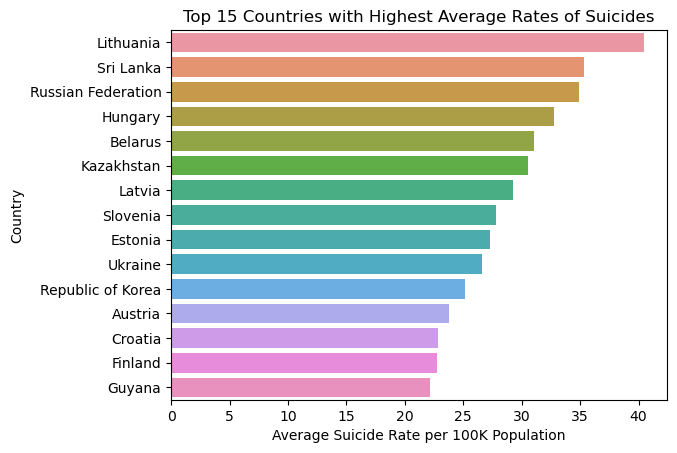

In [88]:
_ = sns.barplot(y=top15_rates.index, x= top15_rates)

_ = plt.title('Top 15 Countries with Highest Average Rates of Suicides')
_ = plt.ylabel('Country')
_ = plt.xlabel('Average Suicide Rate per 100K Population')

Lithuana ranks as the country with the highest average rates of suicides at 40.42 per 100,000 people. 

In [91]:
df.corr()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.001785
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,1.000000


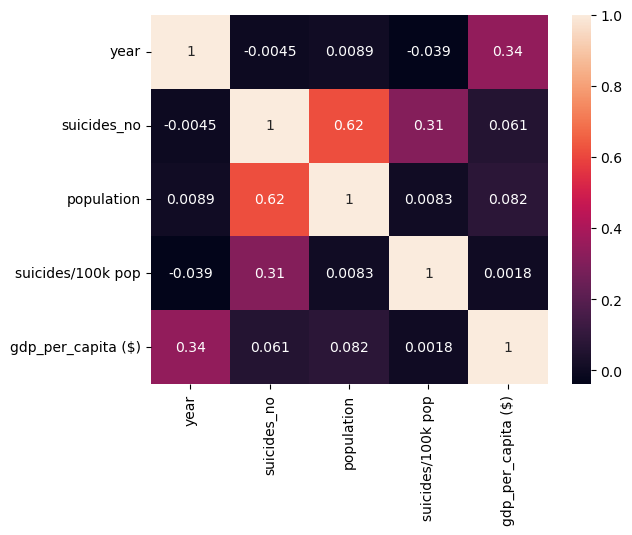

In [93]:
_ = sns.heatmap(df.corr(), annot=True)

There is no significant correlation besides a country's population and their number of suicides with a moderately positve correlation of 0.62. 

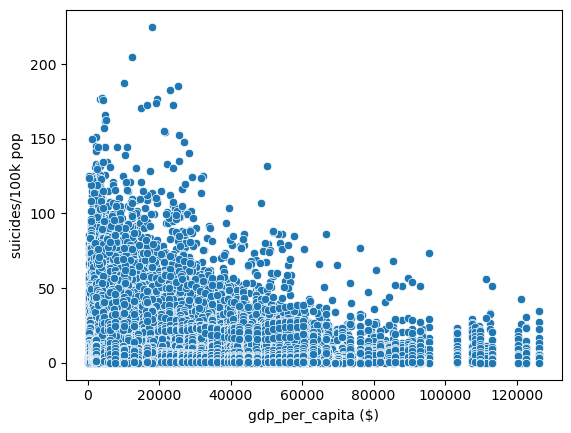

In [96]:
_ = sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df)

There is a slightly negative curvilinear association between GDP per capita and Suicides per 100K population. 

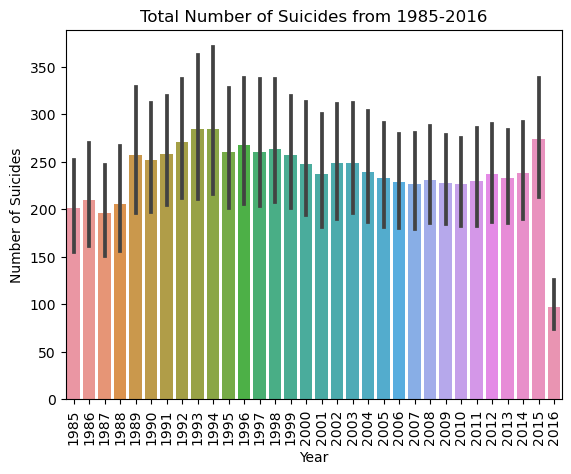

In [108]:
sns.barplot(x='year', y='suicides_no', data=df)
_ = plt.title('Total Number of Suicides from 1985-2016')
_ = plt.ylabel('Number of Suicides')
_ = plt.xlabel('Year')
_ = plt.xticks(rotation=90)
_ = plt.ticklabel_format(style='plain', axis='y')

The total number of suicides each year has been relatively stable each year, with a slight downward trend from 1994-2015. There is also big drop between 2015 to 2016, which may be attributed to 2016 having less data during time of data collection. 

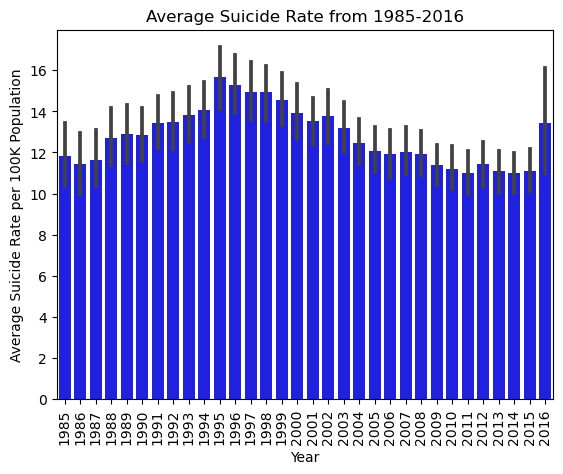

In [103]:
sns.barplot(x='year', y='suicides/100k pop', color='b', data=df)
_ = plt.title('Average Suicide Rate from 1985-2016')
_ = plt.ylabel('Average Suicide Rate per 100K Population')
_ = plt.xlabel('Year')
_ = plt.xticks(rotation=90)

While the average suicide rate increased from 1985 to 1995, there is a general downward trend from 1996 to 2015. There is however, a large increase in average suicide rate between 2015 and 2016. The 2016 rate may be skewed due to having less counts.  

In [120]:
df.loc[df['year'] == 2016]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
1248,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,"10,546,135,160",3788,Silent
1249,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,"10,546,135,160",3788,Boomers
1250,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,"10,546,135,160",3788,Generation X
1251,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,"10,546,135,160",3788,Millenials
1252,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,"10,546,135,160",3788,Silent
...,...,...,...,...,...,...,...,...,...,...,...
25307,Thailand,2016,female,75+ years,69,1589015,4.34,Thailand2016,"411,755,164,833",6713,Silent
25308,Thailand,2016,female,55-74 years,222,6049756,3.67,Thailand2016,"411,755,164,833",6713,Boomers
25309,Thailand,2016,female,35-54 years,375,10629684,3.53,Thailand2016,"411,755,164,833",6713,Generation X
25310,Thailand,2016,female,25-34 years,116,4702656,2.47,Thailand2016,"411,755,164,833",6713,Millenials


In [123]:
df['year'].value_counts(ascending=True)

2016     160
1986     576
1985     576
1988     588
1989     624
1987     648
2015     744
1991     768
1990     768
1992     780
1993     780
1994     816
1996     924
1997     924
1995     936
2014     936
1998     948
2013     960
2012     972
1999     996
2004    1008
2005    1008
2008    1020
2006    1020
2011    1032
2003    1032
2002    1032
2000    1032
2007    1032
2010    1056
2001    1056
2009    1068
Name: year, dtype: int64

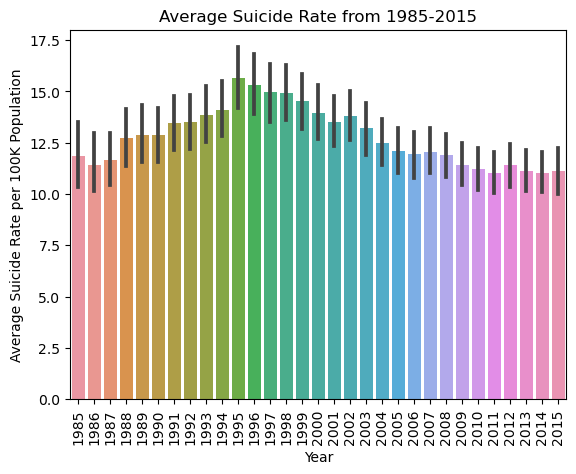

In [126]:
df1985_2015 = df[df['year'] != 2016]

sns.barplot(x='year', y='suicides/100k pop', data=df1985_2015)
_ = plt.title('Average Suicide Rate from 1985-2015')
_ = plt.ylabel('Average Suicide Rate per 100K Population')
_ = plt.xlabel('Year')
_ = plt.xticks(rotation=90)

There is a decline in average rates of suicides since the peak rate in 1995. 

## Conclusions

In this notebook, I investigated the issue of suicide by analysing suicide rates data from 1985 to 2016.

**1. Middle-aged people (35-54 years) have the highest number of suicides.**

The hypothesis I sought to answer was whether people aged 35-54 years suffer from the highest number of suicides. My analysis showed that my hypothesis was correct. Individuals between the ages of 35 to 54 years old have the have the highest total number of suicides at around 2.45 million suicides, which is over 800K higher than the second highest age group of 55 to 74 years old (1.62 million). The age group with lowest number of suicides are those aged between 5 and 14 years old (52K) and those over 75 years (650K). 

**2. Are there gender differences in suicides?**

In terms of gender, males (5.19 million) have significantly more suicides than females (1.56 million). 

**3. Which country has the highest average rate of suicide?**

When comparing average suicide rates between different countries, Lithuana ranks as the country with the highest average rates of suicides at 40.42 per 100,000 people. Which is about 18.23 more people per 100K than the 15th highest country Guayana's rate of 22.19 per 100K population. The top 10 countries all have higher than 25 per 100K population, and the top 5 have over 31 per 100K population.  

**4. Is there any relationship between Gross Domestic Product (GDP) and suicide rate?**

When looking at Gross Domestic Product (GDP) per capita and average suicide rate, there is a slightly negative curvilinear correlation. GDP per capita measures the economic output of a nation per person. Which means that GDP per capita decreases the average suicide rate to a certain extent. 

**5. Has the suicide rate changed over the years?**

Lastly, although the average suicide rate increased from 1985 to 1995, there is an overall downward trend since the peak average suicide rate in 1995. 

In conclusion, suicide is an alarming public health issue that impacts many lives across the world. This notebook showed that there are suicide disparities across age groups, gender, and countries. Suicides are preventable and much can be done to prevent hem at an individual, community, and national level. 